In [3]:
import os
from pathlib import Path
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
parent = os.path.join(Path(os.getcwd()).parent)

sys.path.append(parent)

from utils.results import SimulationResults

In [5]:
save_path = Path("C:/Users/bruij_kn/OneDrive - Stichting Deltares/Documents/GitHub/msc-thesis/Figures/Python")

In [6]:
SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 25

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

This notebook looks at the performance of the thermal model over a long period of time, to see how long it takes to get rid of initial conditions for different soil layers.

First load in model results.

In [7]:
# load in the modelling results
# results_folder = Path(r"P:\11210070-usgscoop-202324-arcticxb\runs\val_gt1")

runid1 = 'val_gt15'
runid2 = 'val_gt16'

fname_gt1 = "data/" + runid1 + "_ground_temperature_timeseries.csv"
fname_gt2 = "data/" + runid2 + "_ground_temperature_timeseries.csv"

# df_model = pd.read_csv(os.path.join(results_folder, fname), parse_dates=['time'])
df_gt1 = pd.read_csv(fname_gt1, parse_dates=['time'])
df_gt2 = pd.read_csv(fname_gt2, parse_dates=['time'])

# Lets add some columns to convert to Celcius
colnames1 = ['temp_0m[K]', 'temp_0.5m[K]', 'temp_1.0m[K]', 'temp_2.0m[K]', 'temp_2.95m[K]']
colnames2 = ['temp_0.0m[K]', 'temp_0.5m[K]', 'temp_1.0m[K]', 'temp_2.0m[K]', 'temp_2.95m[K]']

for colname1, colname2 in zip(colnames1, colnames2):
    
    df_gt1[f'{colname2[:-3]}[C]'] = df_gt1[colname1] - 273.15
    df_gt2[f'{colname2[:-3]}[C]'] = df_gt2[colname2] - 273.15

df_gt1.head()

,Unnamed: 0,time,air_temp[K],temp_0m[K],temp_0.5m[K],temp_1.0m[K],temp_2.0m[K],temp_2.95m[K],total_heat_flux[W/m2],long_wave_radiation_flux[W/m2],solar_radiation_flux[W/m2],latent_heat_flux[W/m2],convective_heat_flux[W/m2],temp_0.0m[C],temp_0.5m[C],temp_1.0m[C],temp_2.0m[C],temp_2.95m[C]
0,0,2011-01-01 00:00:00,247.379488,266.044545,266.045859,266.225858,264.056538,263.132166,0.000000,0.000000,0.0,0.000000,0.000000,-7.105455,-7.104141,-6.924142,-9.093462,-10.017834
1,1,2011-01-01 01:00:00,247.379488,256.137764,266.051530,266.184011,264.074118,263.145040,-930.409371,-13.164846,0.0,-7.025107,-910.219418,-17.012236,-7.098470,-6.965989,-9.075882,-10.004960
2,2,2011-01-01 02:00:00,247.560030,252.312692,266.055735,266.153643,264.087075,263.155008,-505.643619,-12.339870,0.0,-6.964844,-486.338905,-20.837308,-7.094265,-6.996357,-9.062925,-9.994992
3,3,2011-01-01 03:00:00,247.865404,250.922880,266.058657,266.129950,264.097312,263.163186,-317.918048,-8.263931,0.0,-6.950936,-302.703181,-22.227120,-7.091343,-7.020050,-9.052688,-9.986814
4,4,2011-01-01 04:00:00,248.032535,250.388591,266.059830,266.110367,264.105855,263.170196,-239.309034,-9.039967,0.0,-6.844316,-223.424751,-22.761409,-7.090170,-7.039633,-9.044145,-9.979804


In [8]:
print(df_gt1.time)

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
87595   2011-12-31 19:00:00
87596   2011-12-31 20:00:00
87597   2011-12-31 21:00:00
87598   2011-12-31 22:00:00
87599   2011-12-31 23:00:00
Name: time, Length: 87600, dtype: datetime64[ns]


Load in data.

In [9]:
# load in Erikson data
df_erikson = pd.read_csv(
    os.path.join(parent, Path(r"database\raw_datasets\erikson\Groundtemperatu\BTI_2011TimeSeriesData_GroundTemperature.csv")),
    )

# parse dates
df_erikson['time'] = pd.to_datetime(df_erikson[["year", "month", "day", "hour", "minute"]])

# only keep data from site BL01, BL02, BL03, BL04 (these are the ones on the center bottom dataset)
site_ids = ['BL01', 'BL02', 'BL03', 'BL04']
df_erikson = df_erikson[df_erikson['SiteID'].isin(site_ids)]

# lets have a look
display(df_erikson.head())
display(df_erikson.tail())

,SiteID,Instrument,Longitude,Latitude,year,month,day,hour,minute,Tair,T10cm,T15cm,T30cm,T50cm,T60cm,T90cm,T100cm,T200cm,T295cm,time
0,BL01,HOBO,-143.77901,70.08405,2011,7,8,7,0,NaN,NaN,NaN,NaN,-1.5,NaN,NaN,-2.7,-4.7,-6.2,2011-07-08 07:00:00
1,BL01,HOBO,-143.77901,70.08405,2011,7,8,8,0,NaN,NaN,NaN,NaN,-1.5,NaN,NaN,-2.7,-4.7,-6.2,2011-07-08 08:00:00
2,BL01,HOBO,-143.77901,70.08405,2011,7,8,9,0,NaN,NaN,NaN,NaN,-1.5,NaN,NaN,-2.7,-4.7,-6.2,2011-07-08 09:00:00
3,BL01,HOBO,-143.77901,70.08405,2011,7,8,10,0,NaN,NaN,NaN,NaN,-1.5,NaN,NaN,-2.7,-4.7,-6.2,2011-07-08 10:00:00
4,BL01,HOBO,-143.77901,70.08405,2011,7,8,11,0,NaN,NaN,NaN,NaN,-1.5,NaN,NaN,-2.7,-4.7,-6.2,2011-07-08 11:00:00


,SiteID,Instrument,Longitude,Latitude,year,month,day,hour,minute,Tair,T10cm,T15cm,T30cm,T50cm,T60cm,T90cm,T100cm,T200cm,T295cm,time
7878,BL04,HOBO,-143.77947,70.084211,2011,9,28,15,0,-0.5,NaN,NaN,-0.5,NaN,-0.5,-0.5,NaN,NaN,NaN,2011-09-28 15:00:00
7879,BL04,HOBO,-143.77947,70.084211,2011,9,28,16,0,-0.5,NaN,NaN,-0.4,NaN,-0.5,-0.5,NaN,NaN,NaN,2011-09-28 16:00:00
7880,BL04,HOBO,-143.77947,70.084211,2011,9,28,17,0,-0.4,NaN,NaN,-0.3,NaN,-0.4,-0.4,NaN,NaN,NaN,2011-09-28 17:00:00
7881,BL04,HOBO,-143.77947,70.084211,2011,9,28,18,0,-0.2,NaN,NaN,-0.1,NaN,-0.1,-0.2,NaN,NaN,NaN,2011-09-28 18:00:00
7882,BL04,HOBO,-143.77947,70.084211,2011,9,28,19,0,0.9,NaN,NaN,1.5,NaN,1.5,1.2,NaN,NaN,NaN,2011-09-28 19:00:00


Choose study site.

In [10]:
# Let's for now stick with only BL01
df_erikson = df_erikson[df_erikson['SiteID'].isin(['BL01'])]

df_erikson.head()
print(df_erikson.columns)

Index(['SiteID', 'Instrument', 'Longitude', 'Latitude', 'year', 'month', 'day',
       'hour', 'minute', 'Tair', 'T10cm', 'T15cm', 'T30cm', 'T50cm', 'T60cm',
       'T90cm', 'T100cm', 'T200cm', 'T295cm', 'time'],
      dtype='object')


In [11]:
erikson_columns = ["T50cm", "T100cm", "T200cm", "T295cm"]

print(9 % 2)

1


Let's plot all model results in one large plot.

C:\Users\bruij_kn\AppData\Local\Temp\ipykernel_41664\1223312766.py:33: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


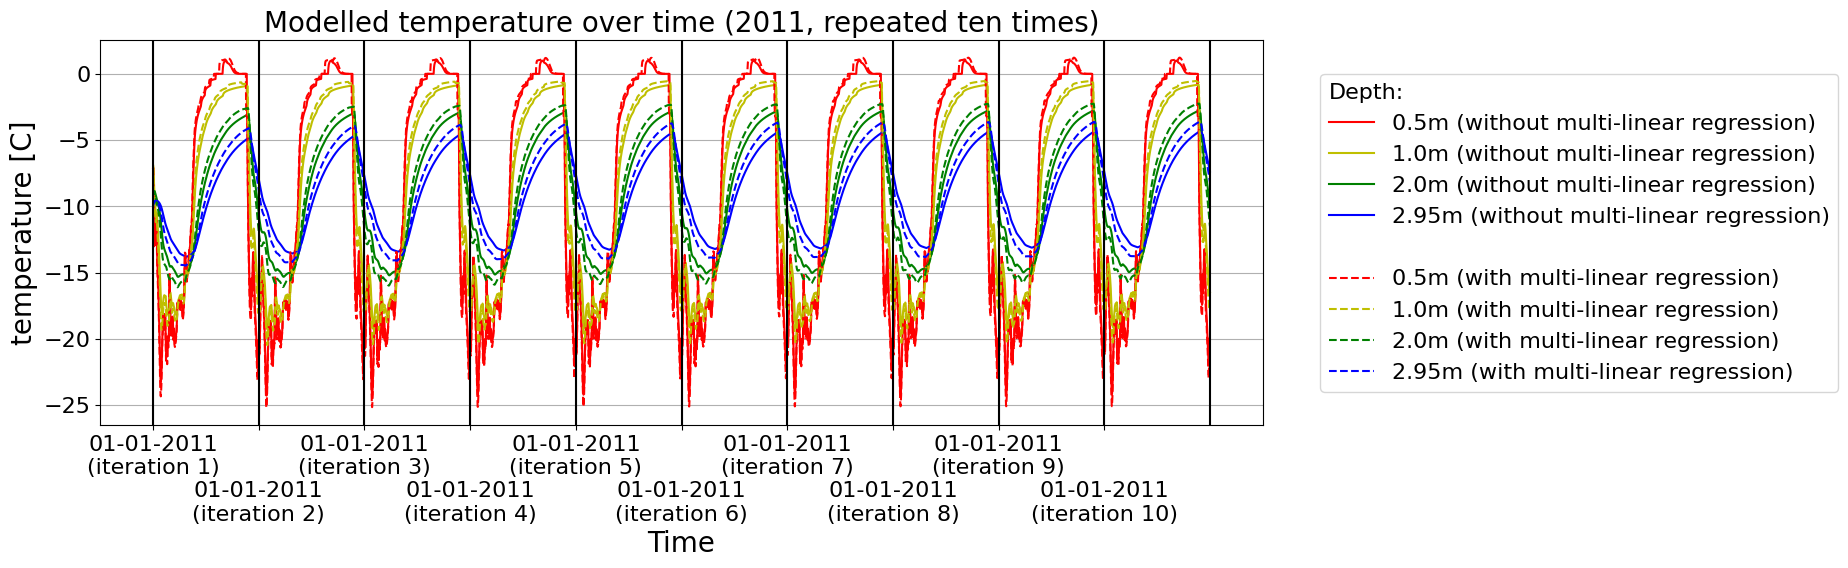

In [12]:
fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(df_gt1.index, df_gt1['temp_0.5m[C]'].values, color='r', label=f'0.5m (without multi-linear regression)')
ax.plot(df_gt1.index, df_gt1['temp_1.0m[C]'].values, color='y', label=f'1.0m (without multi-linear regression)')
ax.plot(df_gt1.index, df_gt1['temp_2.0m[C]'].values, color='g', label=f'2.0m (without multi-linear regression)')
ax.plot(df_gt1.index, df_gt1['temp_2.95m[C]'].values, color='b', label=f'2.95m (without multi-linear regression)')

ax.plot([], [], label=' ', alpha=0)

ax.plot(df_gt2.index, df_gt2['temp_0.5m[C]'].values, '--', color='r', label=f'0.5m (with multi-linear regression)')
ax.plot(df_gt2.index, df_gt2['temp_1.0m[C]'].values, '--', color='y', label=f'1.0m (with multi-linear regression)')
ax.plot(df_gt2.index, df_gt2['temp_2.0m[C]'].values, '--', color='g', label=f'2.0m (with multi-linear regression)')
ax.plot(df_gt2.index, df_gt2['temp_2.95m[C]'].values, '--', color='b', label=f'2.95m (with multi-linear regression)')

ax.grid()
ax.legend(bbox_to_anchor=(1.04, 0.5), title='Depth:', loc='center left', markerscale=5, alignment='left')

ax.set_title("Modelled temperature over time (2011, repeated ten times)")
ax.set_ylabel('temperature [C]')

vline_positions = np.arange(0, 87600+8760, 8760)
for pos in vline_positions:
    ax.axvline(pos, color='k')

xlabels = ['\n' * 2 * (i % 2) + f'01-01-2011\n(iteration {i+1})' for i in range(len(vline_positions))]

ax.set_xticks(vline_positions[:-1], xlabels[:-1])

ax.set_xlabel('Time')

# ax.set_ylim((-5, 5))

fig.show()

fig.savefig(os.path.join(save_path, 'spin_up.png'), bbox_inches='tight', facecolor='white', transparent=False)

Let's make a figure that computes absolute difference between each current timestep and the same date in the last year, with subplots for each depth.

In [13]:
N_single_year = int(len(df_gt1) / 10)

df_last_year1 = df_gt1[9 * N_single_year:]
df_last_year2 = df_gt2[9 * N_single_year:]

print(df_last_year1.columns)
display(df_last_year1.head())
display(df_last_year1.tail())

Index(['Unnamed: 0', 'time', 'air_temp[K]', 'temp_0m[K]', 'temp_0.5m[K]',
       'temp_1.0m[K]', 'temp_2.0m[K]', 'temp_2.95m[K]',
       'total_heat_flux[W/m2]', 'long_wave_radiation_flux[W/m2]',
       'solar_radiation_flux[W/m2]', 'latent_heat_flux[W/m2]',
       'convective_heat_flux[W/m2]', 'temp_0.0m[C]', 'temp_0.5m[C]',
       'temp_1.0m[C]', 'temp_2.0m[C]', 'temp_2.95m[C]'],
      dtype='object')


,Unnamed: 0,time,air_temp[K],temp_0m[K],temp_0.5m[K],temp_1.0m[K],temp_2.0m[K],temp_2.95m[K],total_heat_flux[W/m2],long_wave_radiation_flux[W/m2],solar_radiation_flux[W/m2],latent_heat_flux[W/m2],convective_heat_flux[W/m2],temp_0.0m[C],temp_0.5m[C],temp_1.0m[C],temp_2.0m[C],temp_2.95m[C]
78840,78840,2011-01-01 00:00:00,246.282822,247.002570,253.142097,256.619704,263.005224,265.759731,-67.057835,-42.388559,0.0,-1.295411,-23.373865,-26.147430,-20.007903,-16.530296,-10.144776,-7.390269
78841,78841,2011-01-01 01:00:00,247.379488,247.261489,253.130190,256.621749,262.996931,265.754796,-7.926722,-13.164846,0.0,-7.025107,12.263231,-25.888511,-20.019810,-16.528251,-10.153069,-7.395204
78842,78842,2011-01-01 02:00:00,247.560030,247.458117,253.117839,256.623677,262.988660,265.749858,-8.875991,-12.339870,0.0,-6.964844,10.428722,-25.691883,-20.032161,-16.526323,-10.161340,-7.400142
78843,78843,2011-01-01 03:00:00,247.865404,247.710946,253.105083,256.625478,262.980413,265.744916,0.077207,-8.263931,0.0,-6.950936,15.292074,-25.439054,-20.044917,-16.524522,-10.169587,-7.405084
78844,78844,2011-01-01 04:00:00,248.032535,247.892697,253.091970,256.627145,262.972190,265.739970,-2.623454,-9.039967,0.0,-6.844316,13.260829,-25.257303,-20.058030,-16.522855,-10.177810,-7.410030


,Unnamed: 0,time,air_temp[K],temp_0m[K],temp_0.5m[K],temp_1.0m[K],temp_2.0m[K],temp_2.95m[K],total_heat_flux[W/m2],long_wave_radiation_flux[W/m2],solar_radiation_flux[W/m2],latent_heat_flux[W/m2],convective_heat_flux[W/m2],temp_0.0m[C],temp_0.5m[C],temp_1.0m[C],temp_2.0m[C],temp_2.95m[C]
87595,87595,2011-12-31 19:00:00,247.201009,247.485362,253.197994,256.617452,263.063547,265.805849,-48.579500,-37.690393,0.0,-1.151705,-9.737402,-25.664638,-19.952006,-16.532548,-10.086453,-7.344151
87596,87596,2011-12-31 20:00:00,247.038005,247.308726,253.189214,256.619908,263.055139,265.800933,-50.317676,-40.469442,0.0,-0.864293,-8.983941,-25.841274,-19.960786,-16.530092,-10.094861,-7.349067
87597,87597,2011-12-31 21:00:00,247.271162,247.243352,253.179645,256.622305,263.046753,265.796013,-38.677678,-38.260185,0.0,-1.327861,0.910368,-25.906648,-19.970355,-16.527695,-10.103247,-7.353987
87598,87598,2011-12-31 22:00:00,248.281168,247.406884,253.169385,256.624632,263.038388,265.791089,-10.811813,-37.830219,0.0,-1.374218,28.392624,-25.743116,-19.980615,-16.525368,-10.111612,-7.358911
87599,87599,2011-12-31 23:00:00,247.215452,247.321429,253.158514,256.626874,263.030045,265.786161,-37.961784,-33.310331,0.0,-1.351039,-3.300414,-25.828571,-19.991486,-16.523126,-10.119955,-7.363839


In [14]:
for df, df_last_year in zip([df_gt1, df_gt2], [df_last_year1, df_last_year2]):
    
    for d in ['0.5', '1.0', '2.0', '2.95']:
        
        temp_modelled = df[f'temp_{d}m[C]'].values
        
        temp_final_year_repeated = np.tile(df_last_year[f'temp_{d}m[C]'].values, 10)
        
        df[f'error{d}m[C]'] = np.abs(temp_modelled - temp_final_year_repeated)

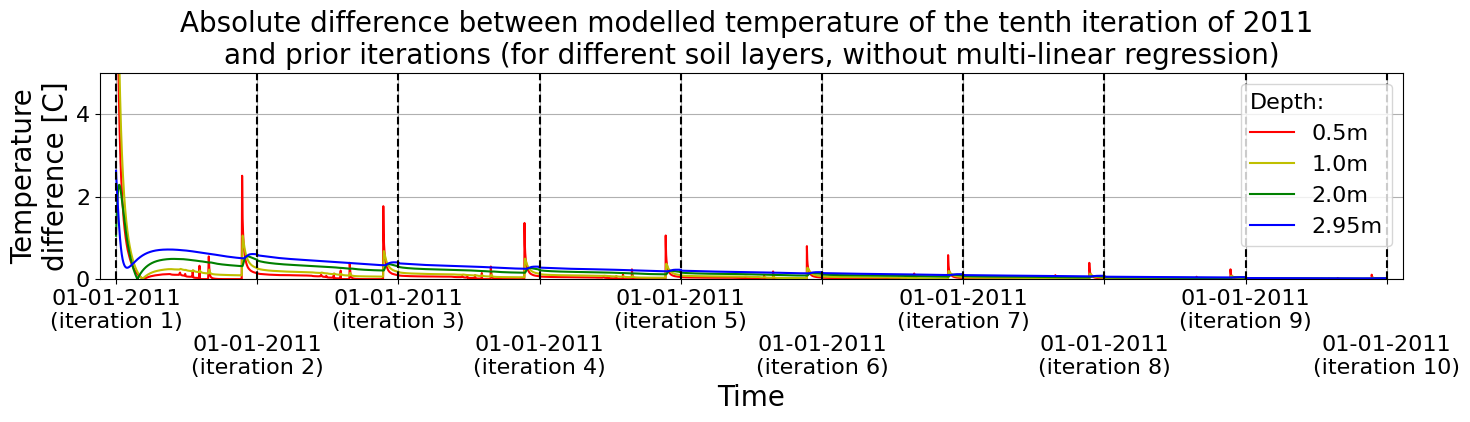

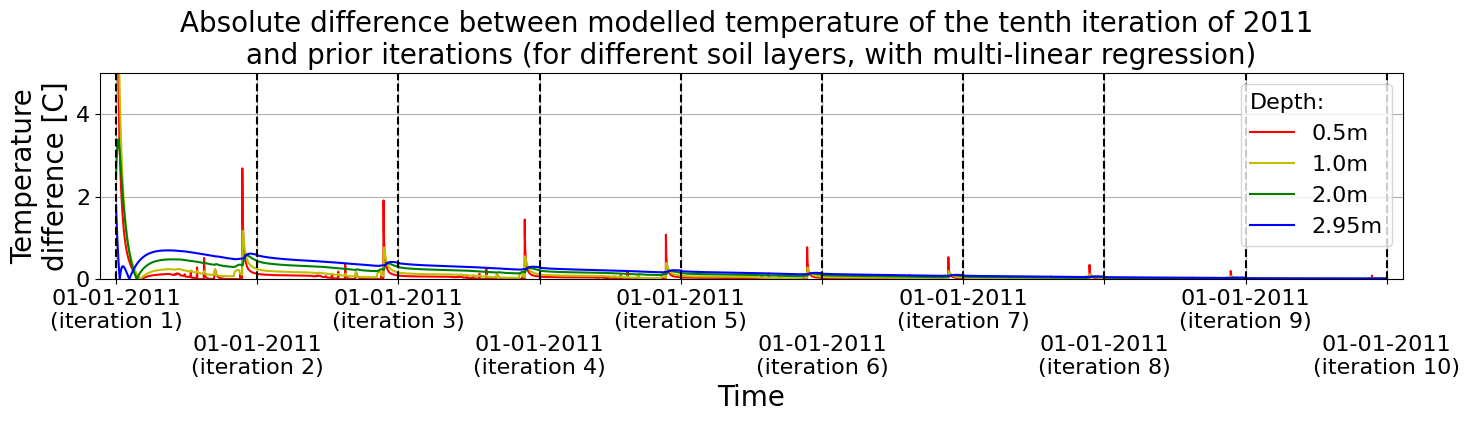

In [15]:
fig1, ax1 = plt.subplots(figsize=(15,4.5))
fig2, ax2 = plt.subplots(figsize=(15,4.5))

df1_plot = df_gt1[:9*N_single_year]
df2_plot = df_gt2[:9*N_single_year]

ax1.plot(df1_plot.index, df1_plot['error0.5m[C]'], color='r', label='0.5m')
ax1.plot(df1_plot.index, df1_plot['error1.0m[C]'], color='y', label='1.0m')
ax1.plot(df1_plot.index, df1_plot['error2.0m[C]'], color='g', label='2.0m')
ax1.plot(df1_plot.index, df1_plot['error2.95m[C]'], color='b', label='2.95m')

ax2.plot(df2_plot.index, df2_plot['error0.5m[C]'], color='r', label='0.5m')
ax2.plot(df2_plot.index, df2_plot['error1.0m[C]'], color='y', label='1.0m')
ax2.plot(df2_plot.index, df2_plot['error2.0m[C]'], color='g', label='2.0m')
ax2.plot(df2_plot.index, df2_plot['error2.95m[C]'], color='b', label='2.95m')

ax1.set_title("Absolute difference between modelled temperature of the tenth iteration of 2011 \nand prior iterations (for different soil layers, without multi-linear regression)")
ax2.set_title("Absolute difference between modelled temperature of the tenth iteration of 2011 \nand prior iterations (for different soil layers, with multi-linear regression)")

for ax in [ax1, ax2]:
    
    vline_positions = np.arange(0, 87600+8760, 8760)
    for pos in vline_positions:
        ax.axvline(pos, color='k', ls='--')

    xlabels = ['\n' * 2 * (i % 2) + f'01-01-2011\n(iteration {i+1})' for i in range(len(vline_positions))]

    ax.set_xticks(vline_positions[:-1], xlabels[:-1])

    ax.set_xlabel('Time')
    ax.set_ylabel('Temperature\ndifference [C]')
    
    ax.legend(title='Depth:', alignment='left', loc='upper right')
        
    ax.set_ylim([0, 5])
    ax.set_xlim([-1000, 9*N_single_year + 1000])

    ax.grid()
    
fig1.tight_layout()
fig2.tight_layout()

fig1.savefig(os.path.join(save_path, 'spin_up_error1.png'), bbox_inches='tight', facecolor='white', transparent=False)
fig2.savefig(os.path.join(save_path, 'spin_up_error2.png'), bbox_inches='tight', facecolor='white', transparent=False)


Let's define a function that converts datetime to hour of year, and adds a number corresponding to the number of the iteration.

In [16]:
def time_to_index(date_array, iteration=0):
    
    # print(pd.to_datetime(df_erikson.time).dt.dayofyear.shape)
    # print(pd.to_datetime(df_erikson.time).dt.hour.shape)
    
    return (pd.to_datetime(df_erikson.time).dt.dayofyear * 24 + pd.to_datetime(df_erikson.time).dt.hour).values + iteration * 8760
    
(time_to_index(df_erikson, 9)).shape

(1940,)

And now each one individually, each year layered over eachother

In [17]:
df_gt = [df_gt1, df_gt2][0]

In [18]:
N = len(df_gt1)
years = np.arange(10)

N_year = int(N / len(years))

model_temp_050 = df_gt['temp_0.5m[C]'].values.reshape((len(years), N_year))
model_temp_100 = df_gt['temp_1.0m[C]'].values.reshape((len(years), N_year))
model_temp_200 = df_gt['temp_2.0m[C]'].values.reshape((len(years), N_year))
model_temp_295 = df_gt['temp_2.95m[C]'].values.reshape((len(years), N_year))

print(model_temp_050.shape)

(10, 8760)


C:\Users\bruij_kn\AppData\Local\Temp\ipykernel_41664\1818593750.py:25: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


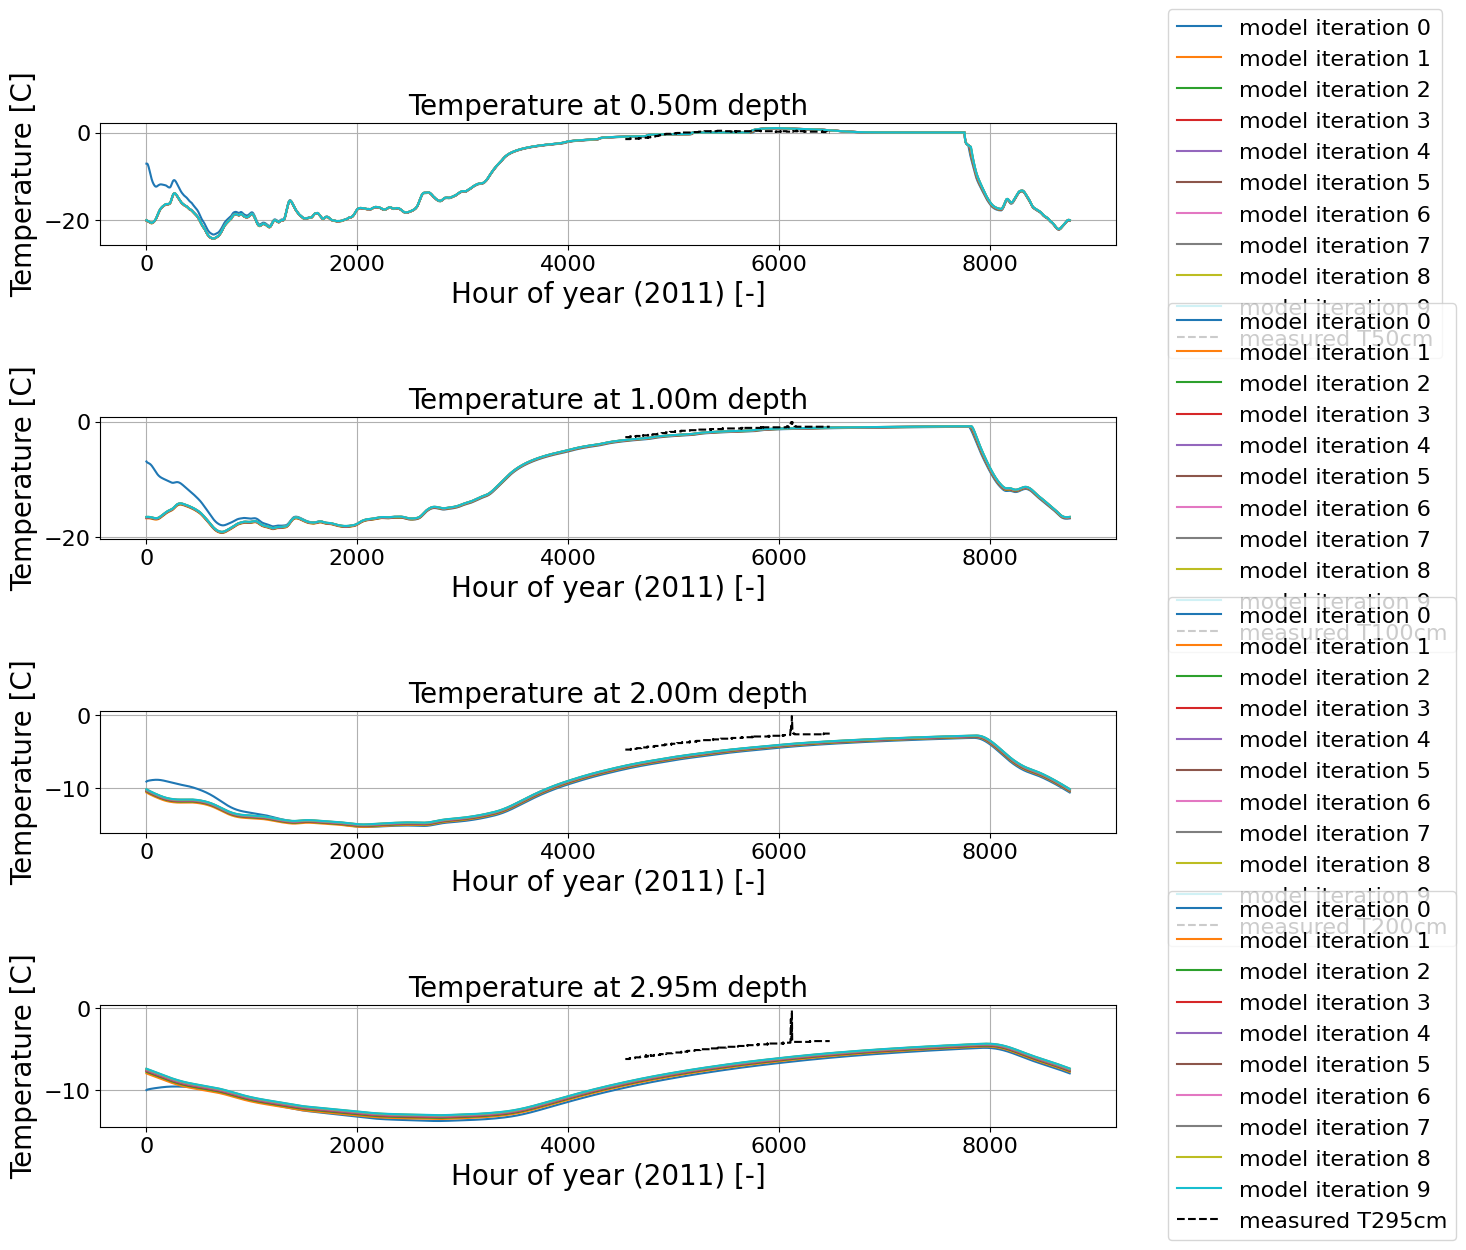

In [19]:
fig, axs = plt.subplots(4, 1, figsize=(15, 12))

# loop through different depths
for i, model_temp in enumerate([model_temp_050, model_temp_100, model_temp_200, model_temp_295]):
    
    # loop through different years
    for it, row in enumerate(model_temp):
        
        axs[i].plot(np.arange(N_year), model_temp[it,:], label=f'model iteration {it}')
        # axs[i].plot(np.arange(N_year), model_temp[it,:], label=f'model iteration {it}', alpha=0.5)

    # also plot measured data
    col = erikson_columns[i]
    axs[i].plot(time_to_index(df_erikson.time), df_erikson[col], "k--", label=f"measured {col}")
    
    # and give the plot some attributes
    axs[i].grid()
    axs[i].legend(bbox_to_anchor=(1.04, 0.5), loc="center left")
    axs[i].set_xlabel('Hour of year (2011) [-]')
    axs[i].set_ylabel('Temperature [C]')
    axs[i].set_title(f'Temperature at {[0.5, 1.0, 2.0, 2.95][i]:.2f}m depth')
    
        
fig.tight_layout()
fig.show()

Text(0.5, 1.0, 'Surface temperature over time (2011 ten times repeated)')

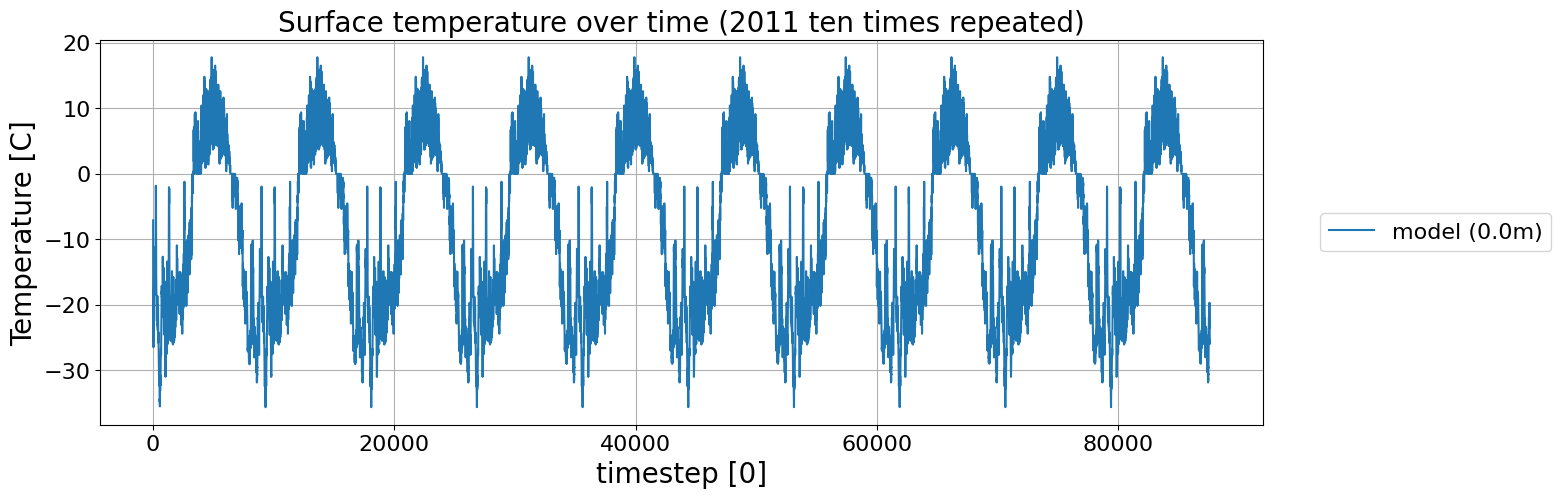

In [20]:
fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(df_gt.index, df_gt['temp_0.0m[C]'], label="model (0.0m)")

ax.grid()
ax.legend(bbox_to_anchor=(1.04, 0.5), loc="center left")
ax.set_xlabel('timestep [0]')
ax.set_ylabel('Temperature [C]')
ax.set_title("Surface temperature over time (2011 ten times repeated)")

